# K-Means Clustering for Determining Public vs. Private Universities

I will be using K-Means clustering on university data to determine if a university is Public or Private. This project could be done with other classification algorithms, but, for the sake of practice and performance comparison, I will be using K-Means clustering to see if we can get adequate results by clustering our data.

# Importing Libraries and Data

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [8]:
college_df = pd.read_csv('College_Data.txt')

In [9]:
college_df.head()

Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56  
2   53        66       12.9           30    8735         54  
3   92        97        7.7           37   19016         59  
4   76        72       11.9            2   10922         15

In [10]:
college_df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

In [11]:
college_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [12]:
# Shape of the dataset
college_df.shape

(777, 19)

In [13]:
college_df.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

In [14]:
# List of all numerical columns
college_df.select_dtypes(include='number').columns

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

In [15]:
# List of all non-numerical columns
college_df.select_dtypes(exclude='number').columns

Index(['Unnamed: 0', 'Private'], dtype='object')

In [16]:
# Data type of each column in a DataFrame
college_df.dtypes

Unnamed: 0      object
Private         object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [17]:
# Find out how many entries
college_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [18]:
# Summarize the data to see the distribution of data 
college_df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

# Data Visualiztion

In [19]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

## Plotting numerical Distributions

/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

<Figure size 1200x800 with 0 Axes>

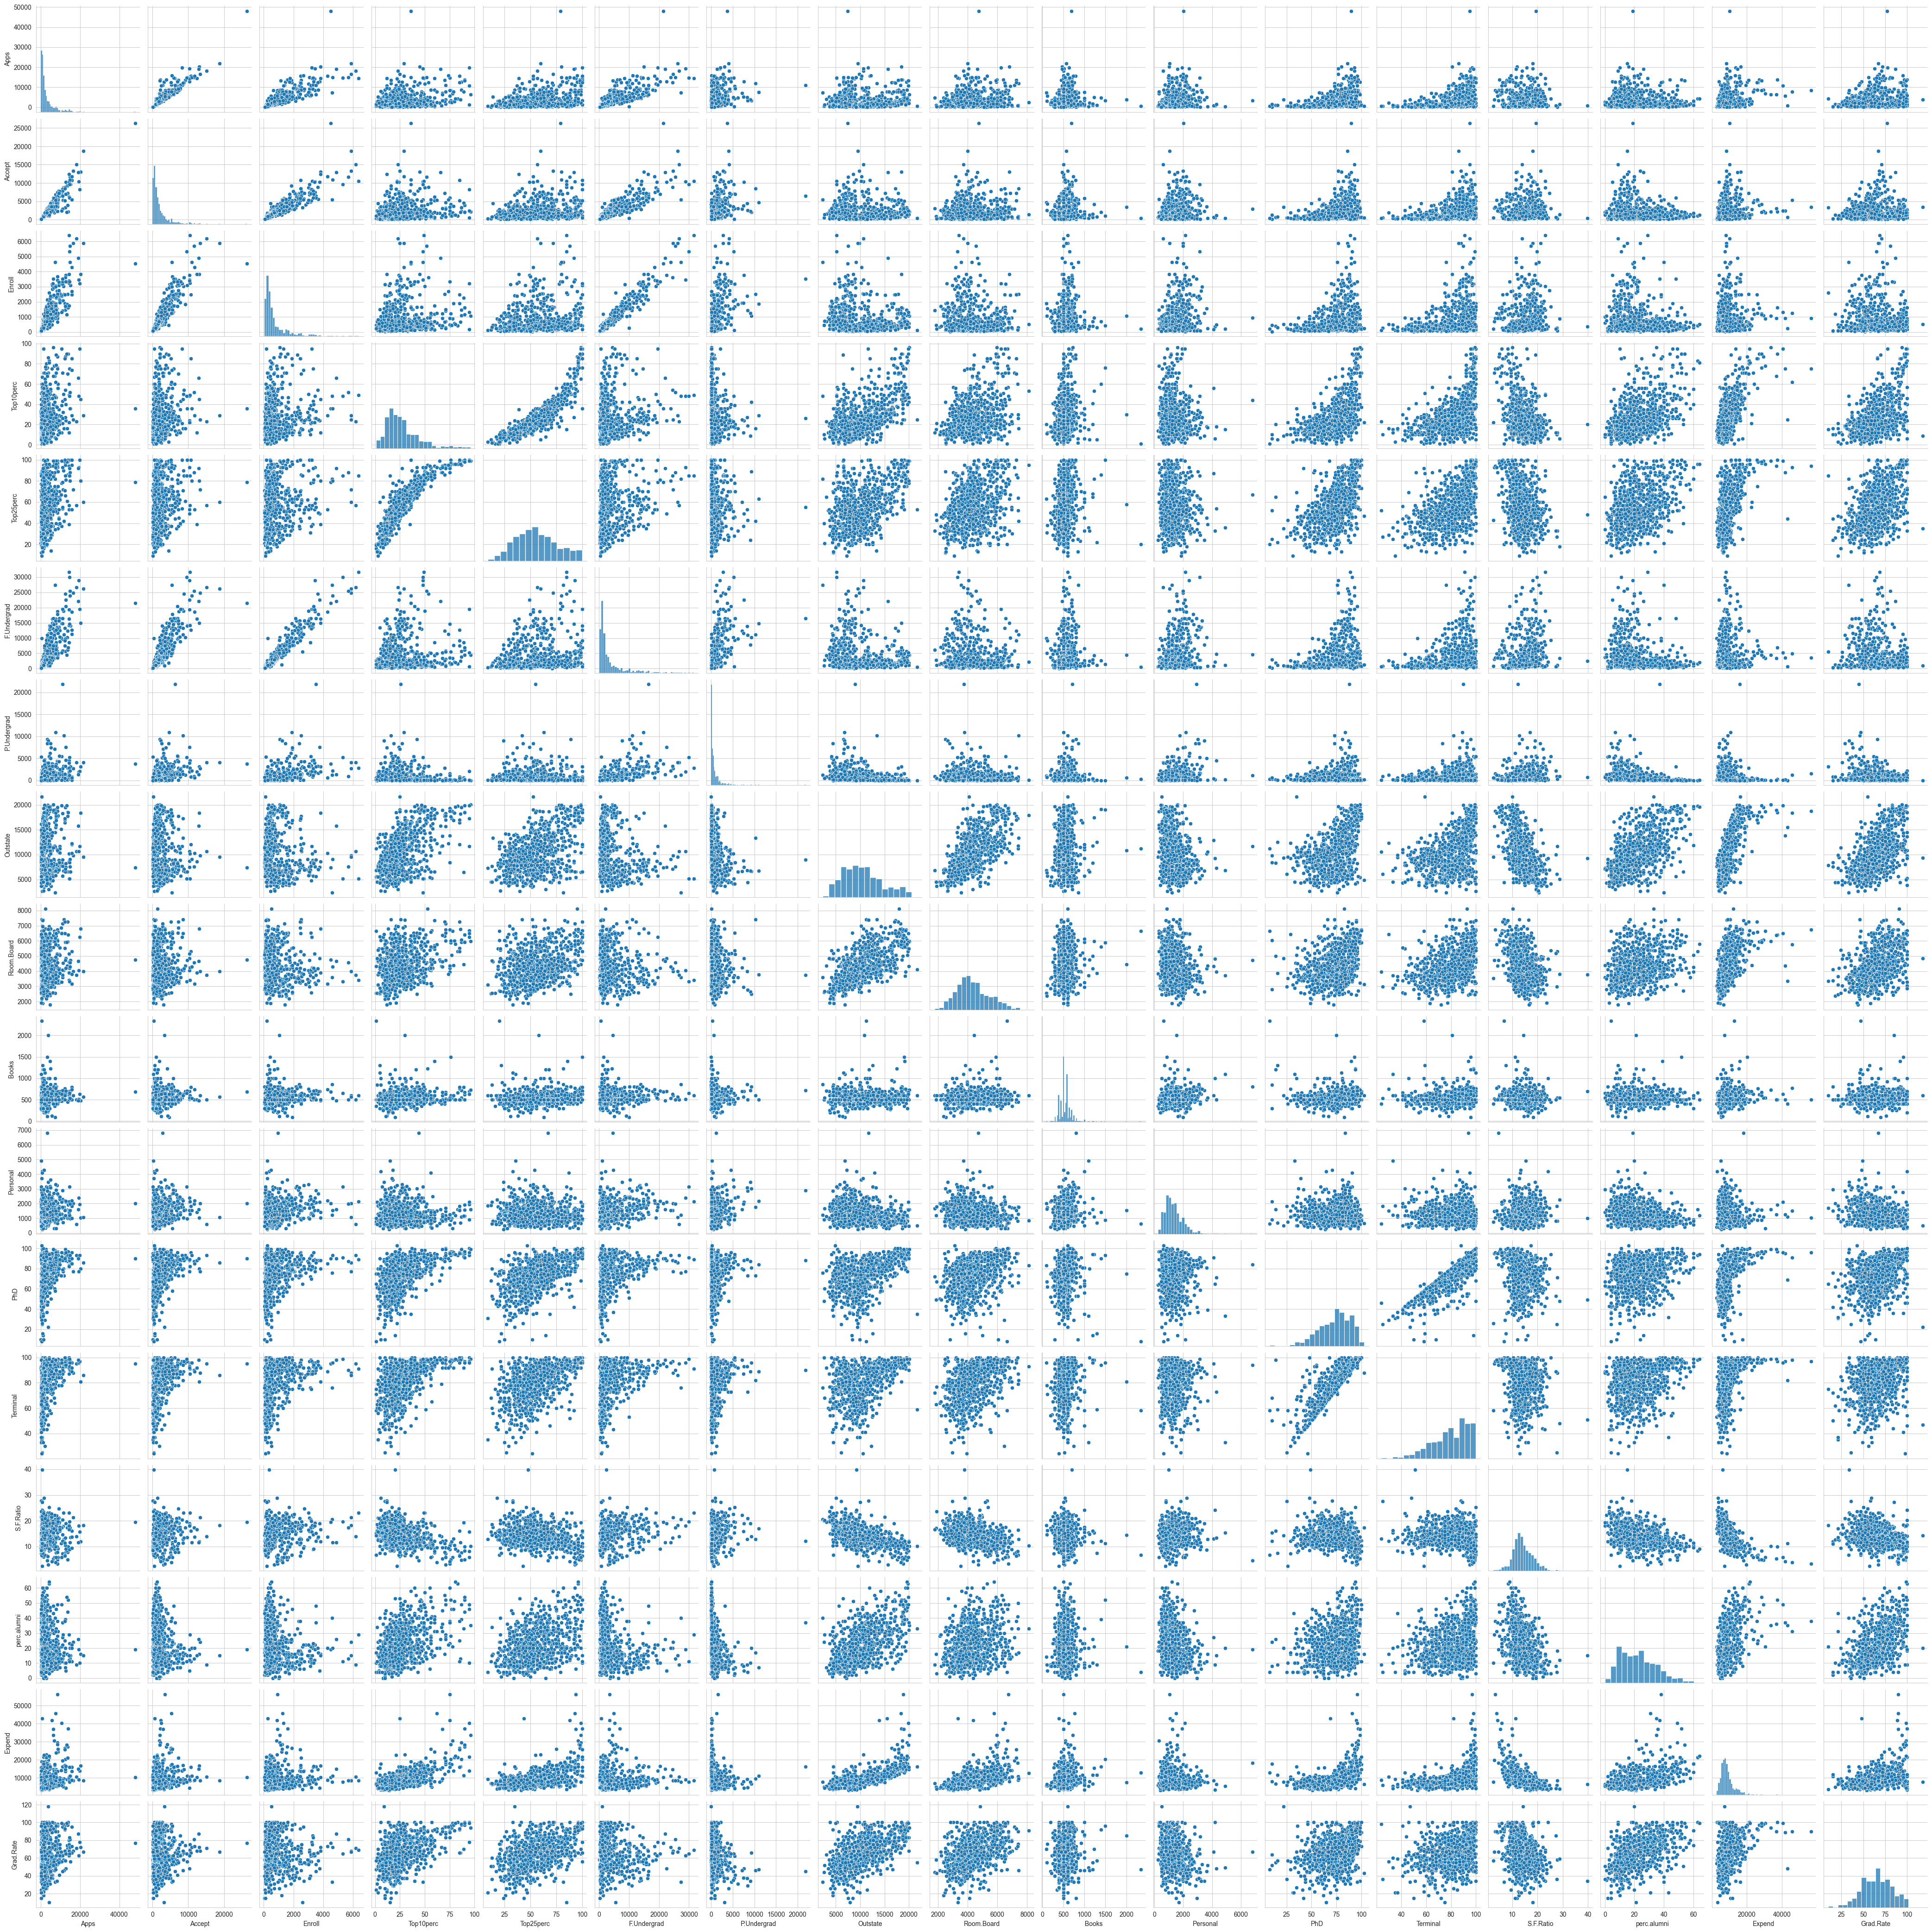

In [21]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of and the correlation between all numerical features
sns.pairplot(data=college_df, palette='Dark2')
plt.show()

/var/folders/n4/d6h4j3h95x333c3mmcxh697w0000gn/T/ipykernel_23188/4083108210.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(college_df['Outstate'].dropna(), kde=False, bins=30)


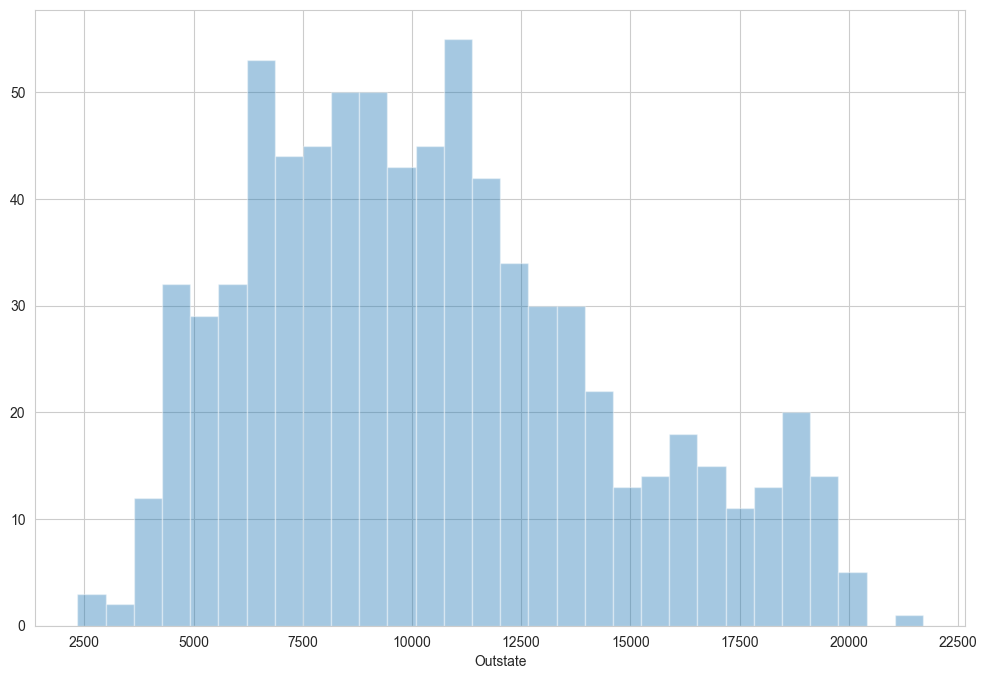

In [22]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of a continious (numeric) feature
sns.distplot(college_df['Outstate'].dropna(), kde=False, bins=30)
plt.show()

In [23]:
# Compute the arithmetic mean (average) value
college_df['Outstate'].mean()

10440.66924066924

/var/folders/n4/d6h4j3h95x333c3mmcxh697w0000gn/T/ipykernel_23188/2485067165.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(college_df['Grad.Rate'].dropna(), kde=False, bins=30)


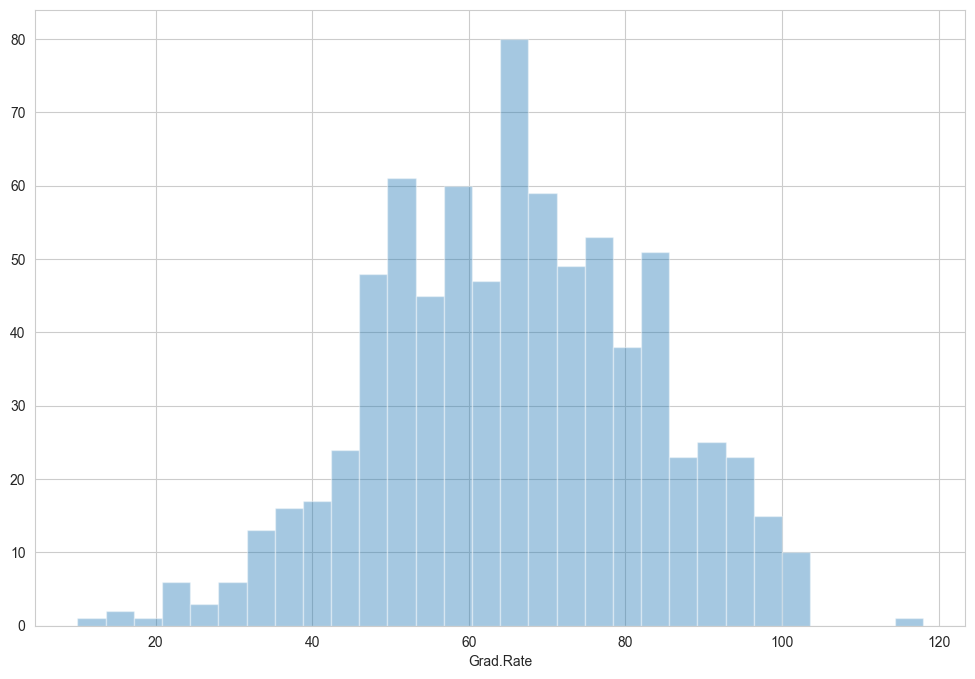

In [24]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of a continious (numeric) feature
sns.distplot(college_df['Grad.Rate'].dropna(), kde=False, bins=30)
plt.show()

In [25]:
# Compute the arithmetic mean (average) value
college_df['Grad.Rate'].mean()

65.46332046332046

In [27]:
# Select only the numerical columns in your DataFrame
numerical_cols = college_df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numerical_cols.corr()


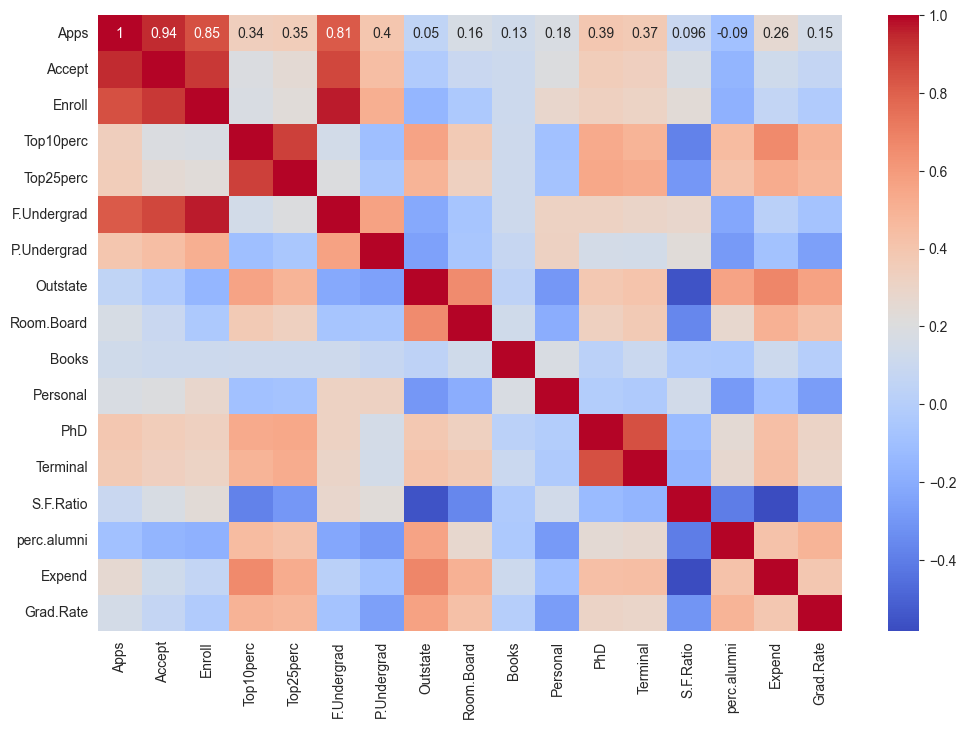

In [29]:
# Set up the graphic area size
plt.figure(figsize=(12, 8))

# Select only the numerical columns in your DataFrame
numerical_cols = college_df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numerical_cols.corr()

# Display the heatmap and explore correlations between continuous (numeric) feature variables through visualization
ax = sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.ylim(17, 0)

plt.show()


## Conclusion:

Resulting correlation table and Heatmap show the correlation score between all numerical feature variables

Very high positive correlation values of >80% between 'Apps', 'Accept', 'Enroll', and 'F.Undergrad' -> highly correlated features

Moderately positive correlation value of 0.67 between 'Expend' and 'Outstate' and 0.66 between 'Expend' and 'Top10perc'

Moderately negative correlation value of -0.58 between 'S.F.Ratio' and 'Expend' and -0.55 between 'S.F.Ratio' and 'Outstate'

Relatively high correlations between predictor variables

/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


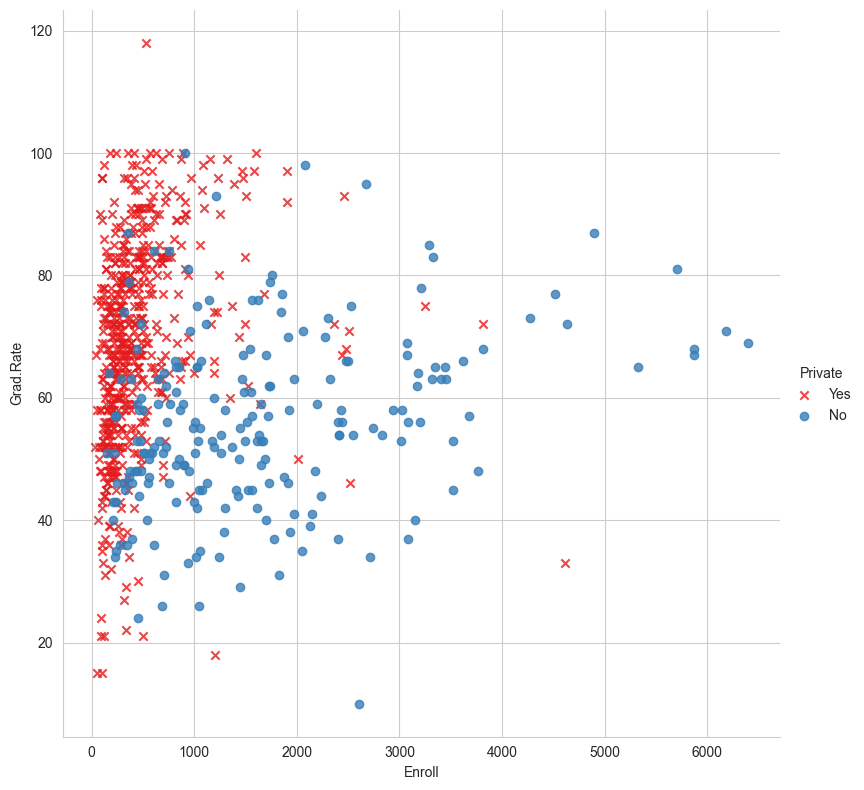

In [30]:
# Display (plot) and explore the relationship between a pair of numerical features as a function of a third feature
sns.lmplot(x='Enroll', y='Grad.Rate', data=college_df, hue='Private', palette='Set1', markers=["x", "o"], height=8, aspect=1, fit_reg=False)


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


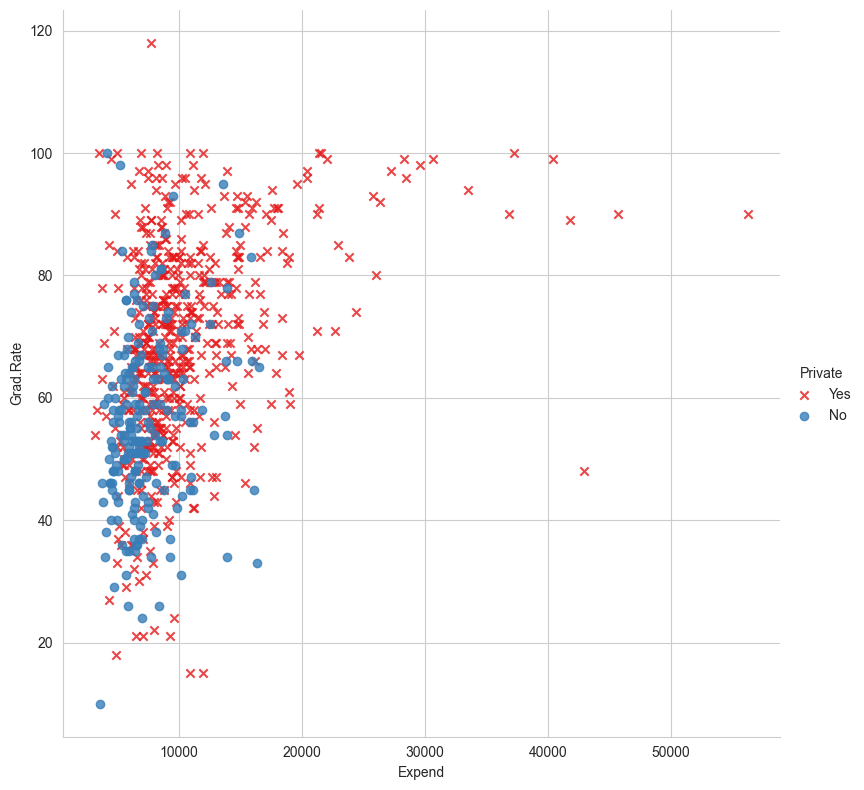

In [31]:
# Display (plot) and explore the relationship between a pair of numerical features as a function of a third feature
sns.lmplot(x='Expend', y='Grad.Rate', data=college_df, hue='Private', palette='Set1', markers=["x", "o"], height=8, aspect=1, fit_reg=False)

/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


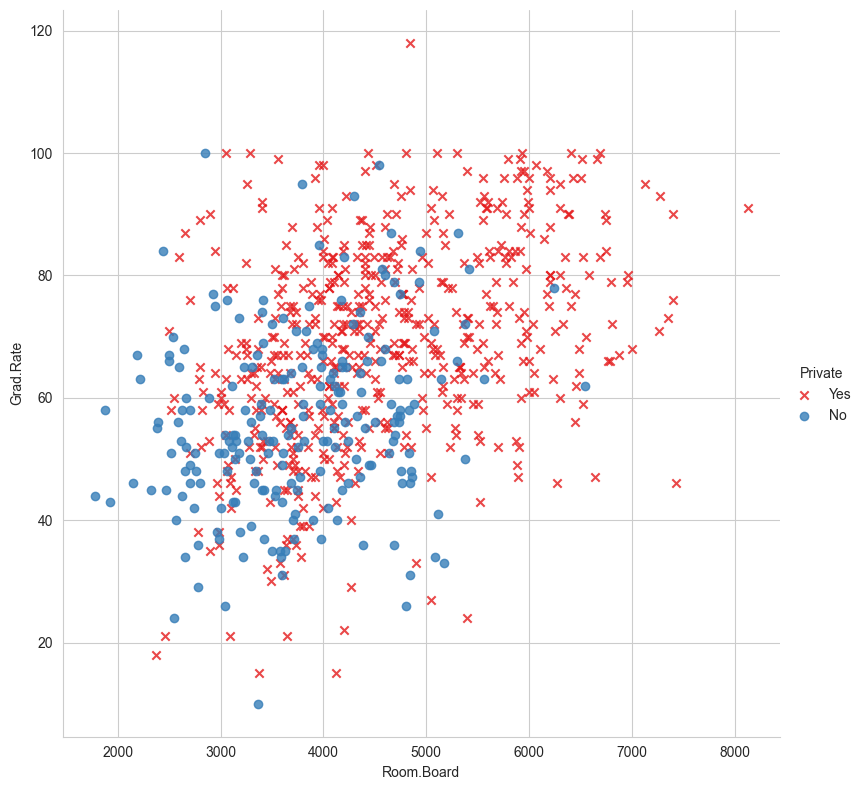

In [32]:
# Display (plot) and explore the relationship between a pair of numerical features as a function of a third feature
sns.lmplot(x='Room.Board', y='Grad.Rate', data=college_df, hue='Private', palette='Set1', markers=["x", "o"], height=8, aspect=1, fit_reg=False)


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


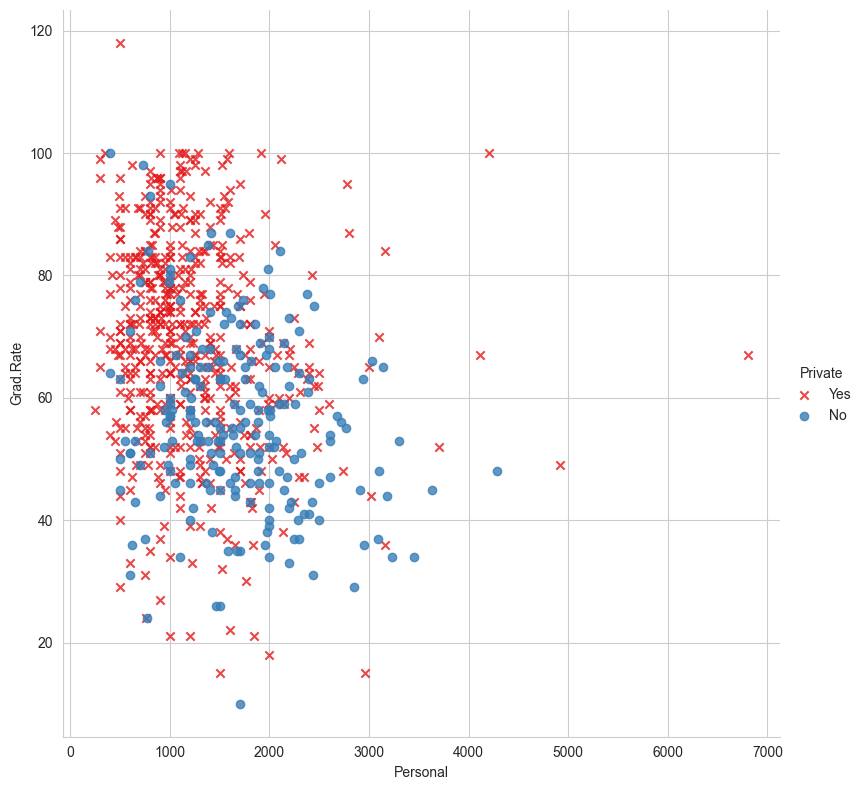

In [33]:
# Display (plot) and explore the relationship between a pair of numerical features as a function of a third feature
sns.lmplot(x='Personal', y='Grad.Rate', data=college_df, hue='Private', palette='Set1', markers=["x", "o"], height=8, aspect=1, fit_reg=False)

/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


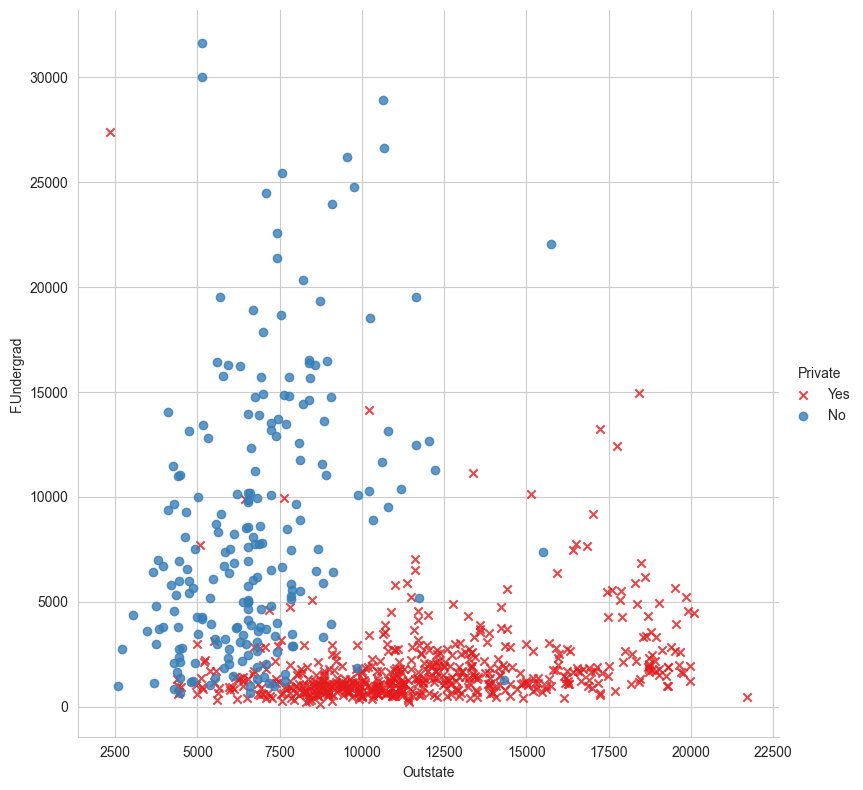

In [34]:
# Display (plot) and explore the relationship between a pair of numerical features as a function of a third feature
sns.lmplot(x='Outstate', y='F.Undergrad', data=college_df, hue='Private', palette='Set1', markers=["x", "o"], height=8, aspect=1, fit_reg=False)


Text(0.5, 0, 'Outstate')

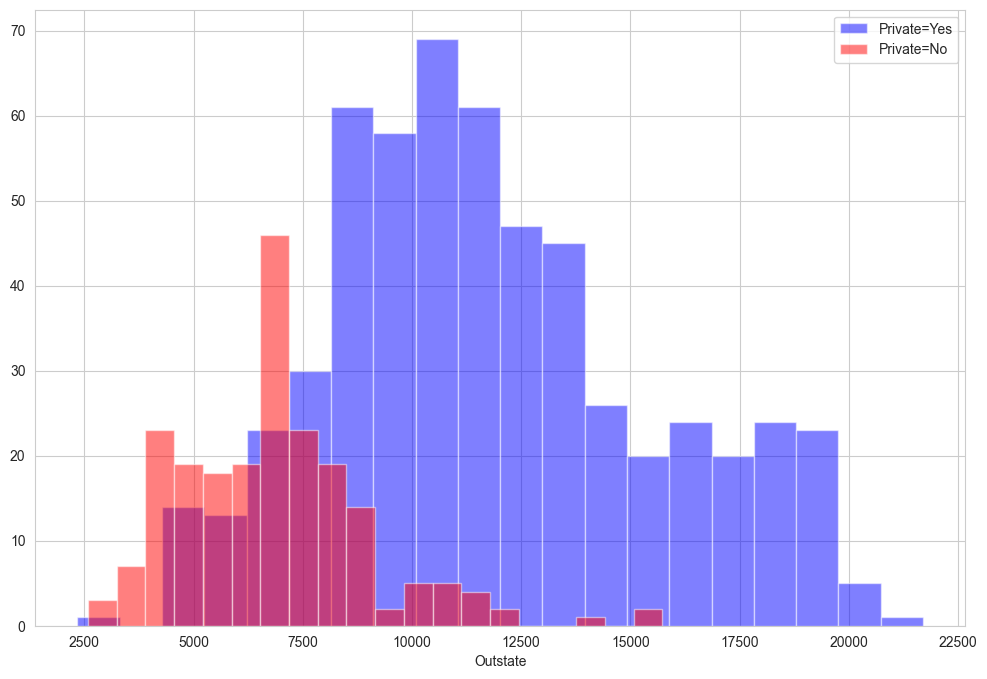

In [35]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the Stacked histogram of a continious (numeric) feature based on categorical feature
college_df[college_df['Private']=='Yes']['Outstate'].hist(alpha=0.5, color='blue', bins=20, label='Private=Yes')
college_df[college_df['Private']=='No']['Outstate'].hist(alpha=0.5, color='red', bins=20, label='Private=No')

# Show a legend on the axes
plt.legend()

# Set the label for the x-axis
plt.xlabel('Outstate')

/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


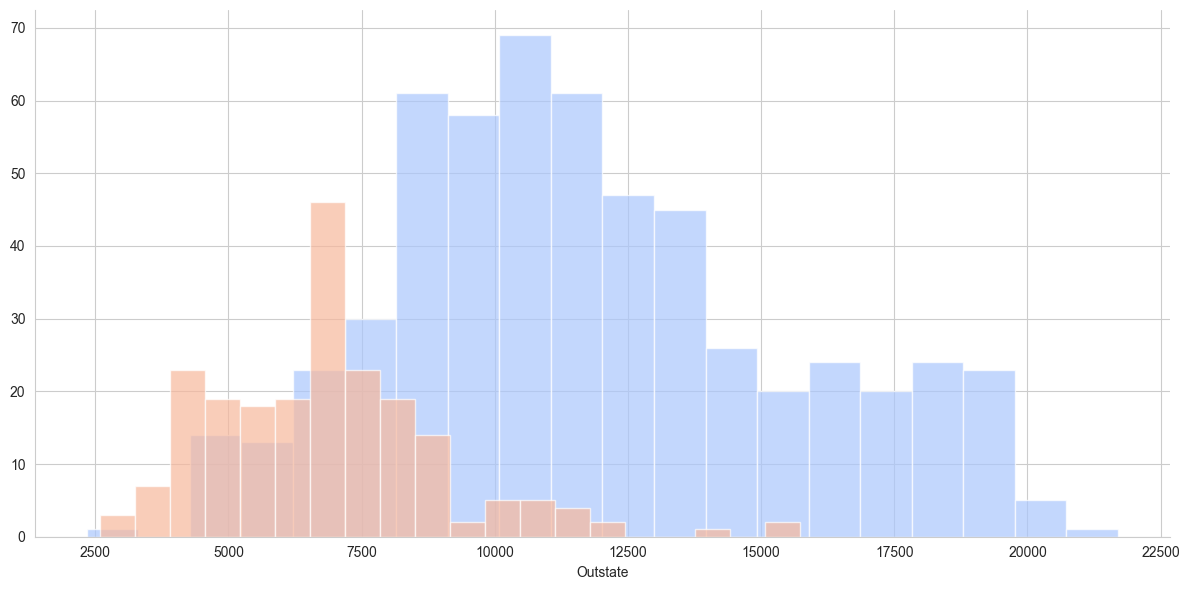

In [36]:
# Initialize a Grid of Facets and display (plot) different subsets of data on top of each other (stacked)
g = sns.FacetGrid(college_df, hue="Private", palette='coolwarm', height=6, aspect=2)

# Draw a univariate plot on the Facet (histogram) and explore the distribution 
g = g.map(plt.hist, 'Outstate', bins=20, alpha=0.7)

Text(0.5, 0, 'Grad.Rate')

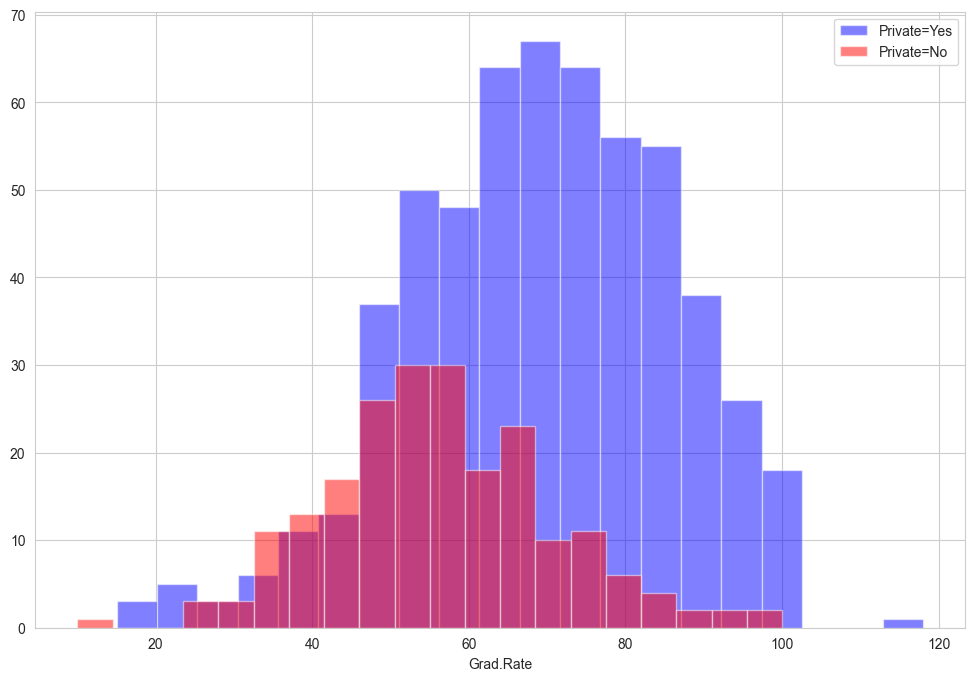

In [37]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the Stacked histogram of a continious (numeric) feature based on categorical feature
college_df[college_df['Private']=='Yes']['Grad.Rate'].hist(alpha=0.5, color='blue', bins=20, label='Private=Yes')
college_df[college_df['Private']=='No']['Grad.Rate'].hist(alpha=0.5, color='red', bins=20, label='Private=No')

# Show a legend on the axes
plt.legend()

# Set the label for the x-axis
plt.xlabel('Grad.Rate')

/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


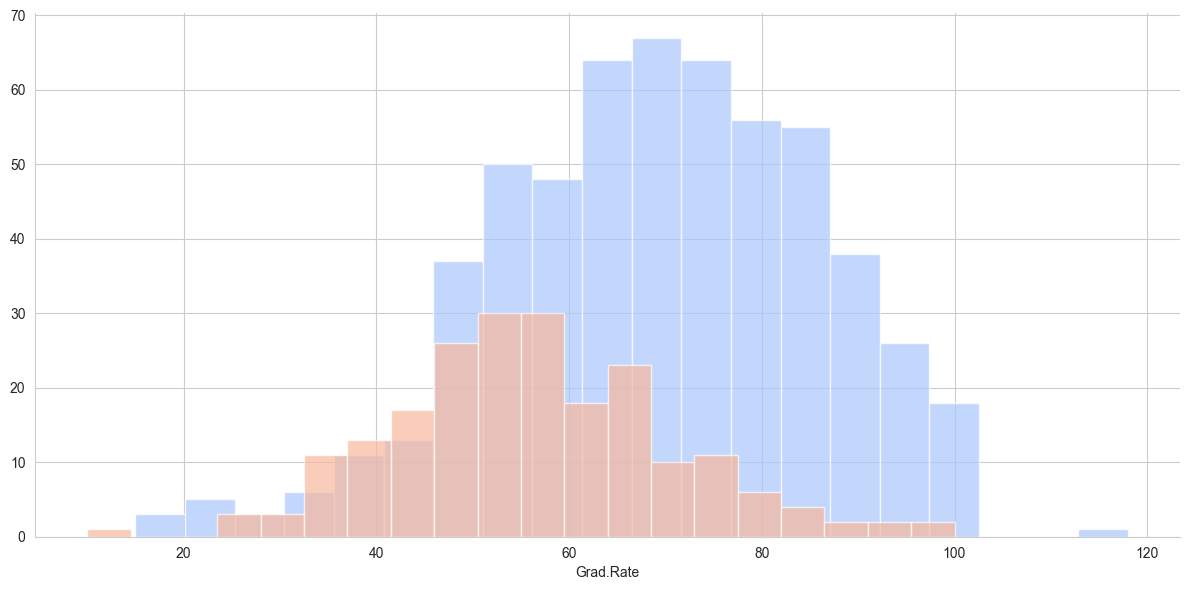

In [38]:
# Initialize a Grid of Facets and display (plot) different subsets of data on top of each other (stacked)
g = sns.FacetGrid(college_df, hue="Private", palette='coolwarm', height=6, aspect=2)

# Draw a univariate plot on the Facet (histogram) and explore the distribution
g = g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.7)

In [40]:
# Total count of missing (null) values for each column and sort them in ascending order
college_df.isnull().sum().sort_values(ascending=False)

Unnamed: 0     0
Room.Board     0
Expend         0
perc.alumni    0
S.F.Ratio      0
Terminal       0
PhD            0
Personal       0
Books          0
Outstate       0
Private        0
P.Undergrad    0
F.Undergrad    0
Top25perc      0
Top10perc      0
Enroll         0
Accept         0
Apps           0
Grad.Rate      0
dtype: int64

In [41]:
# Total count of missing (null) values for each column in % of the total DataFrame and sort them in ascending order
college_df.isnull().mean().sort_values(ascending=False)*100

Unnamed: 0     0.0
Room.Board     0.0
Expend         0.0
perc.alumni    0.0
S.F.Ratio      0.0
Terminal       0.0
PhD            0.0
Personal       0.0
Books          0.0
Outstate       0.0
Private        0.0
P.Undergrad    0.0
F.Undergrad    0.0
Top25perc      0.0
Top10perc      0.0
Enroll         0.0
Accept         0.0
Apps           0.0
Grad.Rate      0.0
dtype: float64

In [42]:
# List all non-numerical columns
college_df.select_dtypes(exclude='number').columns

Index(['Unnamed: 0', 'Private'], dtype='object')

In [43]:
# Create a new column indicating the categorical data (0 or 1)
cluster = pd.get_dummies(college_df['Private'], drop_first=True)

In [44]:
# Concatination of dummy columns to actual DataFrame
college_df = pd.concat([college_df, cluster], axis=1)

In [45]:
# Drop column (feature) from the table
college_df.drop('Private', axis=1, inplace=True)

In [46]:
# Rename column name
college_df.rename(columns={'Yes': 'Cluster'}, inplace=True)

In [47]:
# Display the few top rows of a DataFrame
college_df.head()

Unnamed: 0  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  Cluster  
0        78       18.1           12    7041         60     True  
1        30       12.2           16   10527         56     True  
2        66       12.9           30    8735         54     True  
3        97        7.7           37   19016         59     True  
4        72       11.9            2   10922         15     True

/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

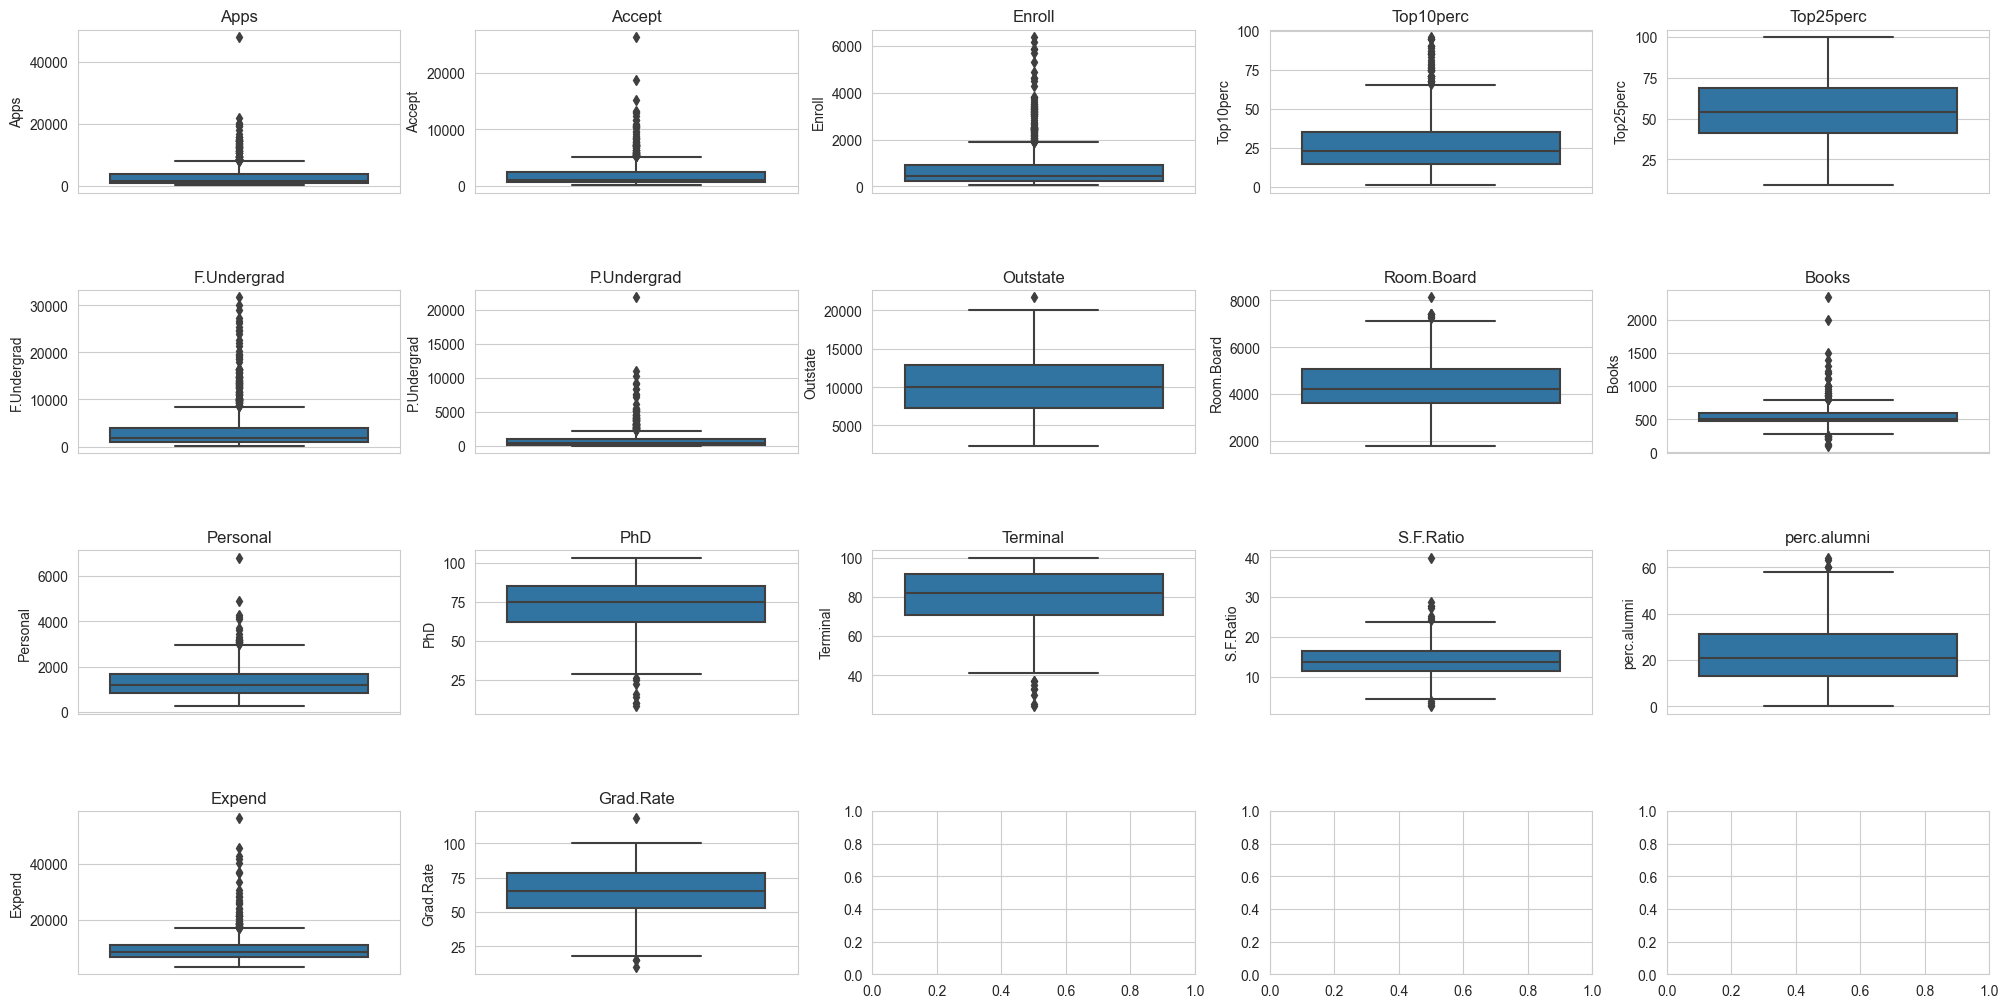

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numerical columns in your DataFrame
numerical_cols = college_df.select_dtypes(include=['number'])

# Create a grid of subplots for boxplots
fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(20, 10))
index = 0
axs = axs.flatten()

# Iterate through the numerical columns and create boxplots
for column in numerical_cols.columns:
    sns.boxplot(y=college_df[column], ax=axs[index])
    axs[index].set_title(column)
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()


In [51]:
import numpy as np

# Define a list of numeric columns
numeric_columns = college_df.select_dtypes(include=[np.number]).columns

# Iterate through the numeric columns and calculate the percentage of outliers using IQR
for column in numeric_columns:
    Q1 = college_df[column].quantile(0.25)   # Lower quartile
    Q3 = college_df[column].quantile(0.75)   # Upper quartile
    IQR = Q3 - Q1                         # IQR score

    cut_off = 1.5 * IQR                   # Calculate the outlier cutoff
    lower = Q1 - cut_off
    upper = Q3 + cut_off

    # Detect outliers with IQR score
    outliers = college_df[(college_df[column] <= lower) | (college_df[column] >= upper)]
    
    # Calculate the percentage of outliers in the column
    perc = len(outliers) * 100.0 / len(college_df)
    
    print(f"Column {column} outliers = {perc:.2f}%")


Column Apps outliers = 9.01%
Column Accept outliers = 9.40%
Column Enroll outliers = 10.17%
Column Top10perc outliers = 5.15%
Column Top25perc outliers = 0.00%
Column F.Undergrad outliers = 12.48%
Column P.Undergrad outliers = 8.62%
Column Outstate outliers = 0.13%
Column Room.Board outliers = 0.90%
Column Books outliers = 6.18%
Column Personal outliers = 2.57%
Column PhD outliers = 1.03%
Column Terminal outliers = 1.03%
Column S.F.Ratio outliers = 1.54%
Column perc.alumni outliers = 0.77%
Column Expend outliers = 6.18%
Column Grad.Rate outliers = 0.51%


In [52]:
# Check the observation that does not make sense for specific feature
college_df[college_df['Grad.Rate'] > 100]

Unnamed: 0  Apps  Accept  Enroll  Top10perc  Top25perc  \
95  Cazenovia College  3847    3433     527          9         35   

    F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
95         1010           12      9384        4840    600       500   22   

    Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  Cluster  
95        47       14.3           20    7697        118     True

In [53]:
# Set the observation to a reasonable value
college_df['Grad.Rate']['Cazenovia College'] = 100

/var/folders/n4/d6h4j3h95x333c3mmcxh697w0000gn/T/ipykernel_23188/2861700153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  college_df['Grad.Rate']['Cazenovia College'] = 100


/var/folders/n4/d6h4j3h95x333c3mmcxh697w0000gn/T/ipykernel_23188/2485067165.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(college_df['Grad.Rate'].dropna(), kde=False, bins=30)


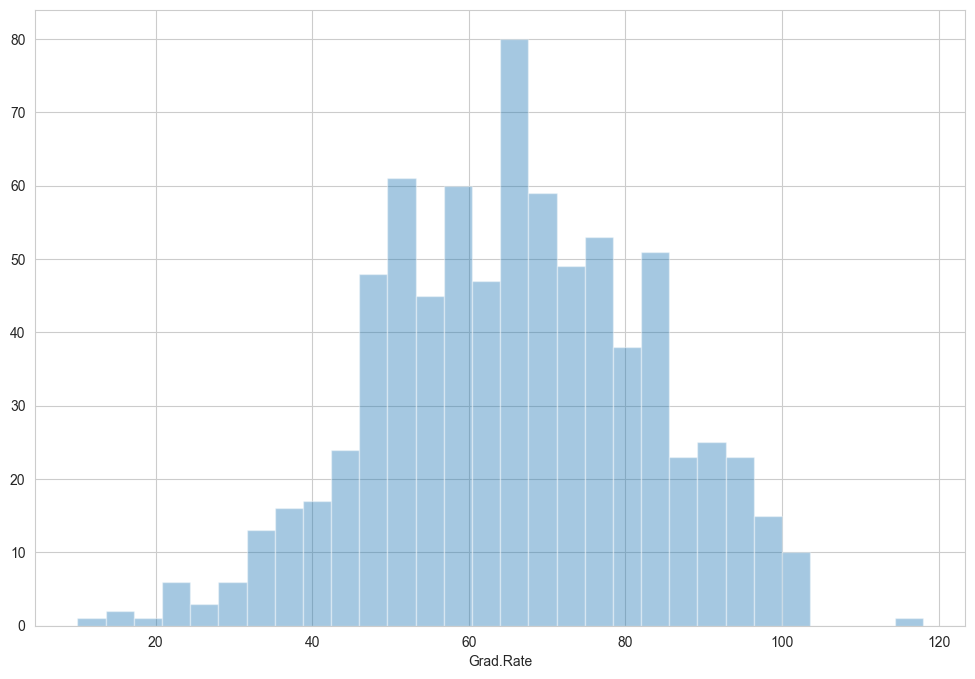

In [54]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of a continious (numeric) feature
sns.distplot(college_df['Grad.Rate'].dropna(), kde=False, bins=30)
plt.show()

In [55]:
# Import preprocessing tool (Standard Scaler) from Scikit-Learn
from sklearn.preprocessing import StandardScaler

In [56]:
# Learn about the function and parameters used within class StandardScaler
help(StandardScaler)

Help on class StandardScaler in module sklearn.preprocessing._data:

class StandardScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  StandardScaler(*, copy=True, with_mean=True, with_std=True)
 |  
 |  Standardize features by removing the mean and scaling to unit variance.
 |  
 |  The standard score of a sample `x` is calculated as:
 |  
 |      z = (x - u) / s
 |  
 |  where `u` is the mean of the training samples or zero if `with_mean=False`,
 |  and `s` is the standard deviation of the training samples or one if
 |  `with_std=False`.
 |  
 |  Centering and scaling happen independently on each feature by computing
 |  the relevant statistics on the samples in the training set. Mean and
 |  standard deviation are then stored to be used on later data using
 |  :meth:`transform`.
 |  
 |  Standardization of a dataset is a common requirement for many
 |  machine learning estimators: they might behave badly if the
 |  individual feat

In [57]:
# Convert a datatype of a column to 'int'
college_df['Cluster'] = college_df['Cluster'].astype(int)

In [58]:
# Split of DataFrame to columns
college_df_new = college_df.drop('Cluster', axis=1)
cluster_df = college_df[college_df.columns[-1:]]

In [59]:
# Display the few top rows of a DataFrame
college_df_new.head()

Unnamed: 0  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [60]:
# Display the few top rows of a DataFrame
cluster_df.head()

Cluster
0        1
1        1
2        1
3        1
4        1

In [61]:
# Instantiate the StandardScaler() model with parameters
# Create an instance of class StandardScaler() model (Standard Scaler object)
scaler = StandardScaler()

In [63]:
from sklearn.preprocessing import StandardScaler

# Define the scaler
scaler = StandardScaler()

# Select only the numeric columns
numeric_columns = college_df_new.select_dtypes(include=['number'])

# Fit the scaler to the numeric columns
scaler.fit(numeric_columns)


StandardScaler()

In [65]:
# Remove the "Unnamed: 0" column from college_df_new if it's not needed for scaling
college_df_new = college_df_new.drop(columns=["Unnamed: 0"])

# Transform the features to a scaled version and create scaled features variable
scaled_features = scaler.transform(college_df_new)

# Check the scaled values
print(scaled_features)


[[-3.46881819e-01 -3.21205453e-01 -6.35089011e-02 ... -8.67574189e-01
  -5.01910084e-01 -3.18251941e-01]
 [-2.10884040e-01 -3.87029908e-02 -2.88584214e-01 ... -5.44572203e-01
   1.66109850e-01 -5.51261842e-01]
 [-4.06865631e-01 -3.76317928e-01 -4.78121319e-01 ...  5.85934748e-01
  -1.77289956e-01 -6.67766793e-01]
 ...
 [-2.33895071e-01 -4.23771558e-02 -9.15087008e-02 ... -2.21570217e-01
  -2.56241250e-01 -9.59029170e-01]
 [ 1.99171118e+00  1.77256262e-01  5.78332661e-01 ...  2.12019418e+00
   5.88797079e+00  1.95359460e+00]
 [-3.26765760e-03 -6.68715889e-02 -9.58163623e-02 ...  4.24433755e-01
  -9.87115613e-01  1.95359460e+00]]


In [70]:
from sklearn.preprocessing import StandardScaler

# Assuming college_df_new is your pre-processed DataFrame with only numeric columns
# If not, make sure to pre-process your data accordingly.

# Create a StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features
scaler.fit(college_df_new)

# Transform the features to a scaled version
scaled_features = scaler.transform(college_df_new)

# Convert the scaled features to a DataFrame
college_df_feat = pd.DataFrame(scaled_features, columns=college_df_new.columns)

# Check the scaled values
college_df_feat.head()


Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

In [71]:
# Display the few top rows of a DataFrame
college_df_feat.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

In [72]:
# Concatination of two DataFrames with reseting index of the DataFrames to concatenate
college_df_feat = pd.concat([college_df_feat.reset_index(drop=True), cluster_df.reset_index(drop=True)], axis=1)

In [73]:
# Display the few top rows of a DataFrame
college_df_feat.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  Cluster  
0   1.013776    -0.867574 -0.501910  -0.318252        1  
1  -0.477704    -0.544572  0.166110  -0.551262        1  
2  -0.300749     0.585935 -0.177290  -0.667767        1  
3  -1.615274     1.151188  1.792851  -0.376504        1  
4  -0.553542    -1.675079  0.241803  -2.939613        1

In [74]:
# Import the 'KMeans' model from family 'cluster' of Scikit-Learn
from sklearn.cluster import KMeans

In [75]:
# Define empty list of Within-Cluster-Sum-of-Squares (WCSS)
wcss = []

# Loop through for number of clusters
for i in range(1,11):

    # Create an instance of class KMeans() model (KMeans object)
    kmeans = KMeans(n_clusters = i)
    
    # Fit the K-Means Clustering model on data in dataset
    kmeans.fit(college_df_feat)
    
    # Calculate the Sum of squared distances of samples to their closest cluster center and append to the WCSS list
    wcss.append(kmeans.inertia_)

/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default 

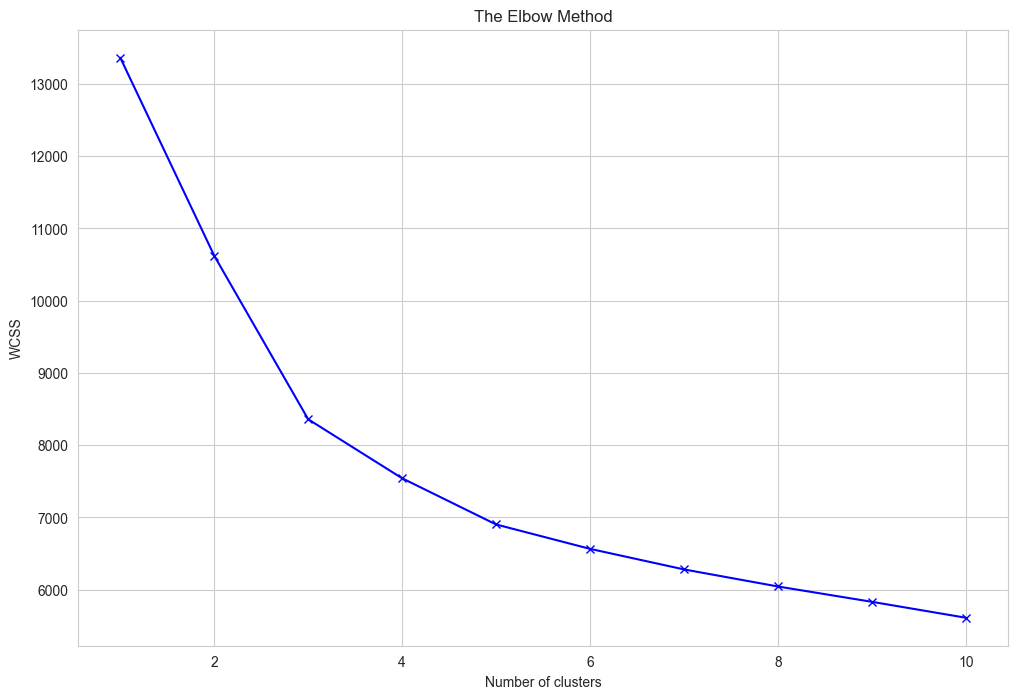

In [76]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Plot the calculated Within-Cluster-Sum-of-Squares (WCSS) based on the number of clusters using the Elbow Method
plt.plot(range(1,11), wcss, "bx-")

# Title of the plot
plt.title('The Elbow Method')

# Label the axes
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Show the plot
plt.show()

In [77]:
# Instantiate the KMeans() model (Estimator) with parameters
# Create an instance of class KMeans() model (KMeans object)
# n_clusters - the number of clusters we expect or want to explore (K=2)
kmeans = KMeans(n_clusters=2)

In [78]:
# Fit the K-Means Clustering model on data in dataset
kmeans.fit(college_df_feat)

/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [79]:
# Centers of the clusters
km_centers = kmeans.cluster_centers_
km_centers

array([[ 0.54154604,  0.50609822,  0.4162237 ,  0.83453297,  0.83979032,
         0.36567472,  0.06221034,  0.76220744,  0.61892254,  0.20105471,
        -0.08162123,  0.8172959 ,  0.79741203, -0.39303606,  0.51790522,
         0.70536601,  0.59902505,  0.7739726 ],
       [-0.32604422, -0.30470243, -0.25059242, -0.50244047, -0.50560572,
        -0.2201588 , -0.03745448, -0.45889603, -0.37262966, -0.12104737,
         0.04914103, -0.49206269, -0.48009137,  0.23663202, -0.31181098,
        -0.42467397, -0.36065013,  0.69896907]])

In [80]:
# Labels of the clusters
km_labels = kmeans.labels_
km_labels

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,

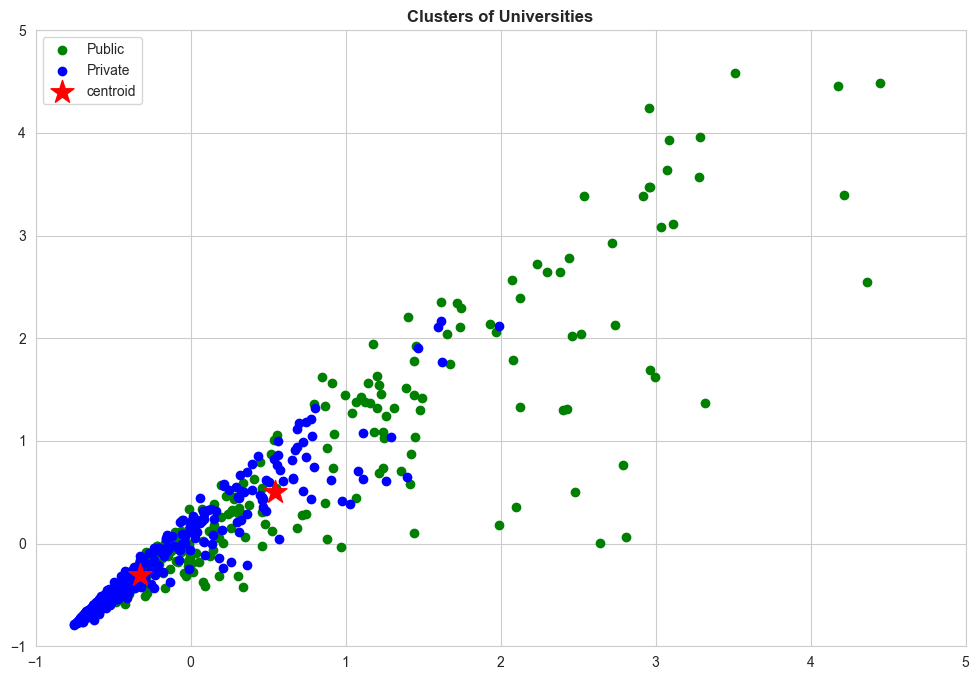

In [81]:
# Set up of the graphic areas size
fig, ax = plt.subplots(figsize=(12,8))

# Plot the clustered data
plt.scatter(scaled_features[km_labels==0,0], scaled_features[km_labels==0,1], c='green', label='Public')
plt.scatter(scaled_features[km_labels==1,0], scaled_features[km_labels==1,1], c='blue', label='Private')

# Plot the centroids
plt.scatter(km_centers[:,0], km_centers[:,1], marker='*', s=300, c='r', label='centroid')

# Configure the ranges of the axes
plt.xlim([-1,5])
plt.ylim([-1,5])

# Title of the plot
plt.title('Clusters of Universities', fontweight='bold')

# Show the legend
plt.legend()

# Show the plot
plt.show()

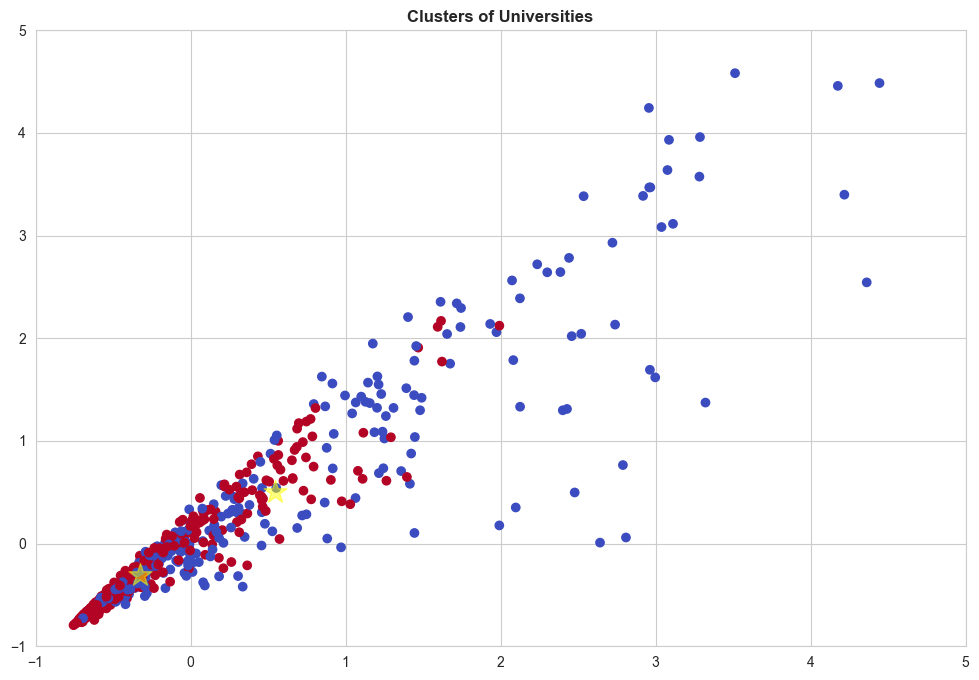

In [82]:
# Set up of the graphic areas size
fig, ax = plt.subplots(figsize=(12,8))

# Plot the clustered data
plt.scatter(scaled_features[:,0], scaled_features[:,1], c=km_labels, cmap='coolwarm')
plt.scatter(km_centers[:,0], km_centers[:,1], marker='*', s=300, c='yellow', alpha=0.5)

# Configure the ranges of the axes
plt.xlim([-1,5])
plt.ylim([-1,5])

# Title of the plot
plt.title('Clusters of Universities', fontweight='bold')

# Show the plot
plt.show()

# Evaluating the model

In [83]:
# Import the Classification report from Scikit-Learn metrics
from sklearn.metrics import classification_report

In [84]:
# Evaluate the performance of the model by using Classification report
print(classification_report(college_df_feat['Cluster'], kmeans.labels_))

              precision    recall  f1-score   support

           0       0.23      0.31      0.26       212
           1       0.70      0.60      0.65       565

    accuracy                           0.52       777
   macro avg       0.46      0.46      0.45       777
weighted avg       0.57      0.52      0.54       777



In [85]:
# Import the Confusion matrix from Scikit-Learn metrics
from sklearn.metrics import confusion_matrix

In [86]:
# Evaluate the performance of the model by using Confusion matrix
confusion_matrix(college_df_feat['Cluster'], kmeans.labels_)

array([[ 66, 146],
       [226, 339]])

In [87]:
# Import the GridSearchCV built-in function from Scikit-Learn
from sklearn.model_selection import GridSearchCV

In [88]:
# Find the names and current values for all parameters for the Estimator
KMeans().get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 'warn',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [89]:
# Create a Grid of parameters variable defined as Dictionary
param_grid = {'algorithm': ['auto', 'full', 'elkan'],
              'n_clusters': [2],
              'n_init': [5,10,15,20,25],
              'max_iter': [250,300,350]}

In [90]:
# Create an instance of GridSearchCV() model (GridSearchCV object)
kmeans_cv = GridSearchCV(KMeans(), param_grid, refit=True, verbose=3)

In [91]:
# Fit the K-Means Clustering model on data in dataset
kmeans_cv.fit(college_df_feat)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END algorithm=auto, max_iter=250, n_clusters=2, n_init=5;, score=-1988.011 total time=   0.1s
[CV 2/5] END algorithm=auto, max_iter=250, n_clusters=2, n_init=5;, score=-2185.061 total time=   0.0s
[CV 3/5] END algorithm=auto, max_iter=250, n_clusters=2, n_init=5;, score=-1951.932 total time=   0.0s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 4/5] END algorithm=auto, max_iter=250, n_clusters=2, n_init=5;, score=-2164.399 total time=   0.1s
[CV 5/5] END algorithm=auto, max_iter=250, n_clusters=2, n_init=5;, score=-2848.911 total time=   0.1s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 1/5] END algorithm=auto, max_iter=250, n_clusters=2, n_init=10;, score=-1988.011 total time=   0.2s
[CV 2/5] END algorithm=auto, max_iter=250, n_clusters=2, n_init=10;, score=-2185.061 total time=   0.2s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 3/5] END algorithm=auto, max_iter=250, n_clusters=2, n_init=10;, score=-1951.932 total time=   0.3s
[CV 4/5] END algorithm=auto, max_iter=250, n_clusters=2, n_init=10;, score=-2165.948 total time=   0.2s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 5/5] END algorithm=auto, max_iter=250, n_clusters=2, n_init=10;, score=-2848.911 total time=   0.3s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 1/5] END algorithm=auto, max_iter=250, n_clusters=2, n_init=15;, score=-1988.011 total time=   0.3s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 2/5] END algorithm=auto, max_iter=250, n_clusters=2, n_init=15;, score=-2200.895 total time=   0.2s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 3/5] END algorithm=auto, max_iter=250, n_clusters=2, n_init=15;, score=-1951.932 total time=   0.2s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 4/5] END algorithm=auto, max_iter=250, n_clusters=2, n_init=15;, score=-2164.399 total time=   0.3s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 5/5] END algorithm=auto, max_iter=250, n_clusters=2, n_init=15;, score=-2849.907 total time=   0.2s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 1/5] END algorithm=auto, max_iter=250, n_clusters=2, n_init=20;, score=-1988.011 total time=   0.3s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 2/5] END algorithm=auto, max_iter=250, n_clusters=2, n_init=20;, score=-2210.929 total time=   0.4s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 3/5] END algorithm=auto, max_iter=250, n_clusters=2, n_init=20;, score=-1951.932 total time=   0.4s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 4/5] END algorithm=auto, max_iter=250, n_clusters=2, n_init=20;, score=-2164.399 total time=   0.3s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 5/5] END algorithm=auto, max_iter=250, n_clusters=2, n_init=20;, score=-2849.907 total time=   0.4s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 1/5] END algorithm=auto, max_iter=250, n_clusters=2, n_init=25;, score=-1988.011 total time=   0.3s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 2/5] END algorithm=auto, max_iter=250, n_clusters=2, n_init=25;, score=-2197.344 total time=   0.3s
[CV 3/5] END algorithm=auto, max_iter=250, n_clusters=2, n_init=25;, score=-1951.932 total time=   0.2s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 4/5] END algorithm=auto, max_iter=250, n_clusters=2, n_init=25;, score=-2164.399 total time=   0.2s
[CV 5/5] END algorithm=auto, max_iter=250, n_clusters=2, n_init=25;, score=-2848.911 total time=   0.2s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. 

[CV 1/5] END algorithm=auto, max_iter=300, n_clusters=2, n_init=5;, score=-1988.011 total time=   0.1s
[CV 2/5] END algorithm=auto, max_iter=300, n_clusters=2, n_init=5;, score=-2204.892 total time=   0.0s
[CV 3/5] END algorithm=auto, max_iter=300, n_clusters=2, n_init=5;, score=-1951.932 total time=   0.0s
[CV 4/5] END algorithm=auto, max_iter=300, n_clusters=2, n_init=5;, score=-2165.948 total time=   0.0s
[CV 5/5] END algorithm=auto, max_iter=300, n_clusters=2, n_init=5;, score=-2848.911 total time=   0.1s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 1/5] END algorithm=auto, max_iter=300, n_clusters=2, n_init=10;, score=-1988.011 total time=   0.1s
[CV 2/5] END algorithm=auto, max_iter=300, n_clusters=2, n_init=10;, score=-2200.895 total time=   0.2s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 3/5] END algorithm=auto, max_iter=300, n_clusters=2, n_init=10;, score=-1951.932 total time=   0.2s
[CV 4/5] END algorithm=auto, max_iter=300, n_clusters=2, n_init=10;, score=-2178.245 total time=   0.1s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 5/5] END algorithm=auto, max_iter=300, n_clusters=2, n_init=10;, score=-2848.911 total time=   0.1s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 1/5] END algorithm=auto, max_iter=300, n_clusters=2, n_init=15;, score=-1988.011 total time=   0.2s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 2/5] END algorithm=auto, max_iter=300, n_clusters=2, n_init=15;, score=-2197.344 total time=   0.3s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 3/5] END algorithm=auto, max_iter=300, n_clusters=2, n_init=15;, score=-1951.932 total time=   0.3s
[CV 4/5] END algorithm=auto, max_iter=300, n_clusters=2, n_init=15;, score=-2164.399 total time=   0.1s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 5/5] END algorithm=auto, max_iter=300, n_clusters=2, n_init=15;, score=-2848.911 total time=   0.1s
[CV 1/5] END algorithm=auto, max_iter=300, n_clusters=2, n_init=20;, score=-1988.011 total time=   0.1s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 2/5] END algorithm=auto, max_iter=300, n_clusters=2, n_init=20;, score=-2204.892 total time=   0.2s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 3/5] END algorithm=auto, max_iter=300, n_clusters=2, n_init=20;, score=-1951.932 total time=   0.4s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 4/5] END algorithm=auto, max_iter=300, n_clusters=2, n_init=20;, score=-2164.634 total time=   0.3s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 5/5] END algorithm=auto, max_iter=300, n_clusters=2, n_init=20;, score=-2848.911 total time=   0.3s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 1/5] END algorithm=auto, max_iter=300, n_clusters=2, n_init=25;, score=-1988.011 total time=   0.4s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 2/5] END algorithm=auto, max_iter=300, n_clusters=2, n_init=25;, score=-2185.061 total time=   0.4s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 3/5] END algorithm=auto, max_iter=300, n_clusters=2, n_init=25;, score=-1951.932 total time=   0.2s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 4/5] END algorithm=auto, max_iter=300, n_clusters=2, n_init=25;, score=-2164.634 total time=   0.4s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 5/5] END algorithm=auto, max_iter=300, n_clusters=2, n_init=25;, score=-2848.911 total time=   0.4s
[CV 1/5] END algorithm=auto, max_iter=350, n_clusters=2, n_init=5;, score=-1988.011 total time=   0.1s
[CV 2/5] END algorithm=auto, max_iter=350, n_clusters=2, n_init=5;, score=-2197.344 total time=   0.0s
[CV 3/5] END algorithm=auto, max_iter=350, n_clusters=2, n_init=5;, score=-1951.932 total time=   0.0s
[CV 4/5] END algorithm=auto, max_iter=350, n_clusters=2, n_init=5;, score=-2164.399 total time=   0.0s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. 

[CV 5/5] END algorithm=auto, max_iter=350, n_clusters=2, n_init=5;, score=-2848.911 total time=   0.1s
[CV 1/5] END algorithm=auto, max_iter=350, n_clusters=2, n_init=10;, score=-1988.011 total time=   0.2s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 2/5] END algorithm=auto, max_iter=350, n_clusters=2, n_init=10;, score=-2185.061 total time=   0.2s
[CV 3/5] END algorithm=auto, max_iter=350, n_clusters=2, n_init=10;, score=-1951.932 total time=   0.2s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 4/5] END algorithm=auto, max_iter=350, n_clusters=2, n_init=10;, score=-2164.399 total time=   0.2s
[CV 5/5] END algorithm=auto, max_iter=350, n_clusters=2, n_init=10;, score=-2848.911 total time=   0.2s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 1/5] END algorithm=auto, max_iter=350, n_clusters=2, n_init=15;, score=-1988.011 total time=   0.2s
[CV 2/5] END algorithm=auto, max_iter=350, n_clusters=2, n_init=15;, score=-2210.929 total time=   0.2s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 3/5] END algorithm=auto, max_iter=350, n_clusters=2, n_init=15;, score=-1951.932 total time=   0.2s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 4/5] END algorithm=auto, max_iter=350, n_clusters=2, n_init=15;, score=-2164.399 total time=   0.3s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 5/5] END algorithm=auto, max_iter=350, n_clusters=2, n_init=15;, score=-2848.911 total time=   0.2s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 1/5] END algorithm=auto, max_iter=350, n_clusters=2, n_init=20;, score=-1988.011 total time=   0.3s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 2/5] END algorithm=auto, max_iter=350, n_clusters=2, n_init=20;, score=-2185.800 total time=   0.3s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 3/5] END algorithm=auto, max_iter=350, n_clusters=2, n_init=20;, score=-1951.932 total time=   0.3s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 4/5] END algorithm=auto, max_iter=350, n_clusters=2, n_init=20;, score=-2164.634 total time=   0.4s
[CV 5/5] END algorithm=auto, max_iter=350, n_clusters=2, n_init=20;, score=-2848.911 total time=   0.2s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 1/5] END algorithm=auto, max_iter=350, n_clusters=2, n_init=25;, score=-1988.011 total time=   0.2s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 2/5] END algorithm=auto, max_iter=350, n_clusters=2, n_init=25;, score=-2185.800 total time=   0.4s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 3/5] END algorithm=auto, max_iter=350, n_clusters=2, n_init=25;, score=-1951.932 total time=   0.2s
[CV 4/5] END algorithm=auto, max_iter=350, n_clusters=2, n_init=25;, score=-2164.634 total time=   0.2s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 5/5] END algorithm=auto, max_iter=350, n_clusters=2, n_init=25;, score=-2848.911 total time=   0.3s
[CV 1/5] END algorithm=full, max_iter=250, n_clusters=2, n_init=5;, score=-1988.011 total time=   0.1s
[CV 2/5] END algorithm=full, max_iter=250, n_clusters=2, n_init=5;, score=-2185.800 total time=   0.1s
[CV 3/5] END algorithm=full, max_iter=250, n_clusters=2, n_init=5;, score=-1956.119 total time=   0.1s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 4/5] END algorithm=full, max_iter=250, n_clusters=2, n_init=5;, score=-2164.399 total time=   0.1s
[CV 5/5] END algorithm=full, max_iter=250, n_clusters=2, n_init=5;, score=-2848.911 total time=   0.1s
[CV 1/5] END algorithm=full, max_iter=250, n_clusters=2, n_init=10;, score=-1988.011 total time=   0.1s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 2/5] END algorithm=full, max_iter=250, n_clusters=2, n_init=10;, score=-2197.344 total time=   0.1s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 3/5] END algorithm=full, max_iter=250, n_clusters=2, n_init=10;, score=-1951.932 total time=   0.2s
[CV 4/5] END algorithm=full, max_iter=250, n_clusters=2, n_init=10;, score=-2165.153 total time=   0.2s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 5/5] END algorithm=full, max_iter=250, n_clusters=2, n_init=10;, score=-2848.911 total time=   0.1s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 1/5] END algorithm=full, max_iter=250, n_clusters=2, n_init=15;, score=-1988.011 total time=   0.3s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 2/5] END algorithm=full, max_iter=250, n_clusters=2, n_init=15;, score=-2185.800 total time=   0.3s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 3/5] END algorithm=full, max_iter=250, n_clusters=2, n_init=15;, score=-1951.932 total time=   0.2s
[CV 4/5] END algorithm=full, max_iter=250, n_clusters=2, n_init=15;, score=-2164.399 total time=   0.1s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 5/5] END algorithm=full, max_iter=250, n_clusters=2, n_init=15;, score=-2848.911 total time=   0.1s
[CV 1/5] END algorithm=full, max_iter=250, n_clusters=2, n_init=20;, score=-1988.011 total time=   0.2s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 2/5] END algorithm=full, max_iter=250, n_clusters=2, n_init=20;, score=-2200.895 total time=   0.2s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 3/5] END algorithm=full, max_iter=250, n_clusters=2, n_init=20;, score=-1951.932 total time=   0.4s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 4/5] END algorithm=full, max_iter=250, n_clusters=2, n_init=20;, score=-2164.399 total time=   0.5s
[CV 5/5] END algorithm=full, max_iter=250, n_clusters=2, n_init=20;, score=-2848.911 total time=   0.2s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 1/5] END algorithm=full, max_iter=250, n_clusters=2, n_init=25;, score=-1988.011 total time=   0.2s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 2/5] END algorithm=full, max_iter=250, n_clusters=2, n_init=25;, score=-2185.061 total time=   0.3s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 3/5] END algorithm=full, max_iter=250, n_clusters=2, n_init=25;, score=-1951.932 total time=   0.2s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 4/5] END algorithm=full, max_iter=250, n_clusters=2, n_init=25;, score=-2164.634 total time=   0.4s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 5/5] END algorithm=full, max_iter=250, n_clusters=2, n_init=25;, score=-2848.911 total time=   0.5s
[CV 1/5] END algorithm=full, max_iter=300, n_clusters=2, n_init=5;, score=-1988.011 total time=   0.1s
[CV 2/5] END algorithm=full, max_iter=300, n_clusters=2, n_init=5;, score=-2185.800 total time=   0.1s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 3/5] END algorithm=full, max_iter=300, n_clusters=2, n_init=5;, score=-1956.119 total time=   0.1s
[CV 4/5] END algorithm=full, max_iter=300, n_clusters=2, n_init=5;, score=-2164.399 total time=   0.2s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 5/5] END algorithm=full, max_iter=300, n_clusters=2, n_init=5;, score=-2861.039 total time=   0.1s
[CV 1/5] END algorithm=full, max_iter=300, n_clusters=2, n_init=10;, score=-1988.011 total time=   0.1s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 2/5] END algorithm=full, max_iter=300, n_clusters=2, n_init=10;, score=-2210.929 total time=   0.2s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 3/5] END algorithm=full, max_iter=300, n_clusters=2, n_init=10;, score=-1951.932 total time=   0.2s
[CV 4/5] END algorithm=full, max_iter=300, n_clusters=2, n_init=10;, score=-2164.399 total time=   0.2s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 5/5] END algorithm=full, max_iter=300, n_clusters=2, n_init=10;, score=-2849.907 total time=   0.1s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 1/5] END algorithm=full, max_iter=300, n_clusters=2, n_init=15;, score=-1988.011 total time=   0.2s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 2/5] END algorithm=full, max_iter=300, n_clusters=2, n_init=15;, score=-2204.892 total time=   0.3s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 3/5] END algorithm=full, max_iter=300, n_clusters=2, n_init=15;, score=-1951.932 total time=   0.3s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 4/5] END algorithm=full, max_iter=300, n_clusters=2, n_init=15;, score=-2164.399 total time=   0.2s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 5/5] END algorithm=full, max_iter=300, n_clusters=2, n_init=15;, score=-2848.911 total time=   0.3s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 1/5] END algorithm=full, max_iter=300, n_clusters=2, n_init=20;, score=-1988.011 total time=   0.3s
[CV 2/5] END algorithm=full, max_iter=300, n_clusters=2, n_init=20;, score=-2210.929 total time=   0.2s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 3/5] END algorithm=full, max_iter=300, n_clusters=2, n_init=20;, score=-1951.932 total time=   0.2s
[CV 4/5] END algorithm=full, max_iter=300, n_clusters=2, n_init=20;, score=-2164.399 total time=   0.1s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 5/5] END algorithm=full, max_iter=300, n_clusters=2, n_init=20;, score=-2849.907 total time=   0.1s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 1/5] END algorithm=full, max_iter=300, n_clusters=2, n_init=25;, score=-1988.011 total time=   0.2s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 2/5] END algorithm=full, max_iter=300, n_clusters=2, n_init=25;, score=-2185.800 total time=   0.3s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 3/5] END algorithm=full, max_iter=300, n_clusters=2, n_init=25;, score=-1951.932 total time=   0.5s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 4/5] END algorithm=full, max_iter=300, n_clusters=2, n_init=25;, score=-2164.634 total time=   0.3s
[CV 5/5] END algorithm=full, max_iter=300, n_clusters=2, n_init=25;, score=-2848.911 total time=   0.1s
[CV 1/5] END algorithm=full, max_iter=350, n_clusters=2, n_init=5;, score=-1988.011 total time=   0.0s
[CV 2/5] END algorithm=full, max_iter=350, n_clusters=2, n_init=5;, score=-2204.892 total time=   0.0s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 3/5] END algorithm=full, max_iter=350, n_clusters=2, n_init=5;, score=-1978.140 total time=   0.1s
[CV 4/5] END algorithm=full, max_iter=350, n_clusters=2, n_init=5;, score=-2167.699 total time=   0.1s
[CV 5/5] END algorithm=full, max_iter=350, n_clusters=2, n_init=5;, score=-2849.907 total time=   0.1s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 1/5] END algorithm=full, max_iter=350, n_clusters=2, n_init=10;, score=-1988.011 total time=   0.1s
[CV 2/5] END algorithm=full, max_iter=350, n_clusters=2, n_init=10;, score=-2210.929 total time=   0.1s
[CV 3/5] END algorithm=full, max_iter=350, n_clusters=2, n_init=10;, score=-1951.932 total time=   0.1s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 4/5] END algorithm=full, max_iter=350, n_clusters=2, n_init=10;, score=-2164.399 total time=   0.1s
[CV 5/5] END algorithm=full, max_iter=350, n_clusters=2, n_init=10;, score=-2849.907 total time=   0.1s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 1/5] END algorithm=full, max_iter=350, n_clusters=2, n_init=15;, score=-1988.011 total time=   0.2s
[CV 2/5] END algorithm=full, max_iter=350, n_clusters=2, n_init=15;, score=-2185.800 total time=   0.1s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 3/5] END algorithm=full, max_iter=350, n_clusters=2, n_init=15;, score=-1951.932 total time=   0.3s
[CV 4/5] END algorithm=full, max_iter=350, n_clusters=2, n_init=15;, score=-2164.634 total time=   0.1s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 5/5] END algorithm=full, max_iter=350, n_clusters=2, n_init=15;, score=-2848.911 total time=   0.2s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 1/5] END algorithm=full, max_iter=350, n_clusters=2, n_init=20;, score=-1988.011 total time=   0.3s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 2/5] END algorithm=full, max_iter=350, n_clusters=2, n_init=20;, score=-2199.844 total time=   0.4s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 3/5] END algorithm=full, max_iter=350, n_clusters=2, n_init=20;, score=-1951.932 total time=   0.4s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 4/5] END algorithm=full, max_iter=350, n_clusters=2, n_init=20;, score=-2164.634 total time=   0.3s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 5/5] END algorithm=full, max_iter=350, n_clusters=2, n_init=20;, score=-2848.911 total time=   0.2s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 1/5] END algorithm=full, max_iter=350, n_clusters=2, n_init=25;, score=-1988.011 total time=   0.3s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 2/5] END algorithm=full, max_iter=350, n_clusters=2, n_init=25;, score=-2210.929 total time=   0.4s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 3/5] END algorithm=full, max_iter=350, n_clusters=2, n_init=25;, score=-1951.932 total time=   0.3s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 4/5] END algorithm=full, max_iter=350, n_clusters=2, n_init=25;, score=-2164.634 total time=   0.4s


/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[CV 5/5] END algorithm=full, max_iter=350, n_clusters=2, n_init=25;, score=-2848.911 total time=   0.3s
[CV 1/5] END algorithm=elkan, max_iter=250, n_clusters=2, n_init=5;, score=-2174.398 total time=   0.1s
[CV 2/5] END algorithm=elkan, max_iter=250, n_clusters=2, n_init=5;, score=-1933.776 total time=   0.1s
[CV 3/5] END algorithm=elkan, max_iter=250, n_clusters=2, n_init=5;, score=-1951.932 total time=   0.1s
[CV 4/5] END algorithm=elkan, max_iter=250, n_clusters=2, n_init=5;, score=-2231.038 total time=   0.1s
[CV 5/5] END algorithm=elkan, max_iter=250, n_clusters=2, n_init=5;, score=-2848.911 total time=   0.1s
[CV 1/5] END algorithm=elkan, max_iter=250, n_clusters=2, n_init=10;, score=-1988.011 total time=   0.1s
[CV 2/5] END algorithm=elkan, max_iter=250, n_clusters=2, n_init=10;, score=-2210.929 total time=   0.3s
[CV 3/5] END algorithm=elkan, max_iter=250, n_clusters=2, n_init=10;, score=-1961.185 total time=   0.2s
[CV 4/5] END algorithm=elkan, max_iter=250, n_clusters=2, n_i

/Users/sridharmalladi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


GridSearchCV(estimator=KMeans(),
             param_grid={'algorithm': ['auto', 'full', 'elkan'],
                         'max_iter': [250, 300, 350], 'n_clusters': [2],
                         'n_init': [5, 10, 15, 20, 25]},
             verbose=3)

In [92]:
# Get the combination of parameters (best parameter setting) that has the best score
print("Best parameters (tuned hyper-parameters): ", kmeans_cv.best_params_)

Best parameters (tuned hyper-parameters):  {'algorithm': 'auto', 'max_iter': 250, 'n_clusters': 2, 'n_init': 5}


In [93]:
# Get the best score
print("Best score: ", kmeans_cv.best_score_)

Best score:  -2227.6629286232373


In [94]:
# Get the best Estimator_
print("Best Estimator: ", kmeans_cv.best_estimator_)

Best Estimator:  KMeans(algorithm='auto', max_iter=250, n_clusters=2, n_init=5)


In [95]:
# Get the re-predictions from the model based of the Testing dataset
kmeans_cv_predictions = kmeans_cv.predict(college_df_feat)

# Check the re-predicted values
kmeans_cv_predictions

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,

In [96]:
# Re-evaluate the performance of the model by using Classification report
print(classification_report(college_df_feat['Cluster'], kmeans_cv_predictions))

              precision    recall  f1-score   support

           0       0.30      0.69      0.42       212
           1       0.77      0.40      0.53       565

    accuracy                           0.48       777
   macro avg       0.54      0.54      0.47       777
weighted avg       0.64      0.48      0.50       777



In [97]:
# Re-evaluate the performance of the model by using Confusion matrix
confusion_matrix(college_df_feat['Cluster'], kmeans_cv_predictions)

array([[146,  66],
       [339, 226]])